<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_prophet/blob/master/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Install packages__

_If you are using Google Colab, this no longer needs to be done. Otherwise, run this pip command `!pip install yfinance` and `!pip install prophet`. To install [yfinance package](https://pypi.org/project/yfinance/) and [prophet package](https://pypi.org/project/prophet/)._

# Forecasting Stocks from Yahoo Finance with Prophet
This Notebook is the code implementation of the [Prophet any Stock in Seconds](https://medium.com/dropout-analytics/prophet-any-stock-in-seconds-5f9479977aea?sk=9617b7531d148d602b891a81f86e355b) Story from Gumdropsteve's [Introduction to Prophet repository](https://github.com/gumdropsteve/intro_to_prophet/).

If you would like to download alternative datasets for this Story, you can find historical stock prices (6/10/23) in the [Datasets repository](https://github.com/gumdropsteve/datasets/tree/master/stocks).

In [1]:
import yfinance as yf

# tag ticker for berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

# source all time historical data for the ticker
hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09 00:00:00-04:00,22.200001,24.400000,22.200001,23.200001,4290000,0.0,0.0
1996-05-10 00:00:00-04:00,24.000000,24.200001,23.600000,24.000000,1060000,0.0,0.0
1996-05-13 00:00:00-04:00,24.000000,24.100000,23.299999,23.900000,700000,0.0,0.0
1996-05-14 00:00:00-04:00,24.000000,24.100000,23.100000,23.600000,310000,0.0,0.0
1996-05-15 00:00:00-04:00,23.600000,23.700001,23.000000,23.200001,545000,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,349.640015,350.000000,345.410004,348.079987,3527600,0.0,0.0
2023-10-03 00:00:00-04:00,347.390015,348.239990,342.130005,343.040009,3151700,0.0,0.0
2023-10-04 00:00:00-04:00,342.920013,344.010010,339.510010,343.690002,3244600,0.0,0.0


In [2]:
import pandas as pd

df = pd.DataFrame()

# create a new dataframe that follows Prophet's ds, y column requirements
df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail(3)

,ds,y
6897,2023-10-04 00:00:00-04:00,343.690002
6898,2023-10-05 00:00:00-04:00,345.059998
6899,2023-10-06 00:00:00-04:00,347.304993


In [3]:
# remove the timezone from the dates (ds) column
df['ds'] = df['ds'].dt.tz_localize(None)

df.tail(3)

,ds,y
6897,2023-10-04,343.690002
6898,2023-10-05,345.059998
6899,2023-10-06,347.304993


In [4]:
from prophet import Prophet

# create a basic Prophet model which does not account for intraday trends
m = Prophet(daily_seasonality=False)

# fit the model to the data
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/ovakajq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/bipnde9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46913', 'data', 'file=/tmp/tmp2uuk0lzv/ovakajq8.json', 'init=/tmp/tmp2uuk0lzv/bipnde9l.json', 'output', 'file=/tmp/tmp2uuk0lzv/prophet_model985pczom/prophet_model-20231006191231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:12:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
# define a future time period of 365 days
future = m.make_future_dataframe(365, freq='D')

# create a forecast for the defined future
forecast = m.predict(future)

# display key columns from the last 5 rows of the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7260,2024-10-01,356.833349,340.486076,373.699610
7261,2024-10-02,356.809931,339.512153,373.844734
7262,2024-10-03,356.752976,340.181975,373.131184
7263,2024-10-04,356.884732,340.284543,373.516732
7264,2024-10-05,359.452795,342.829843,376.281946


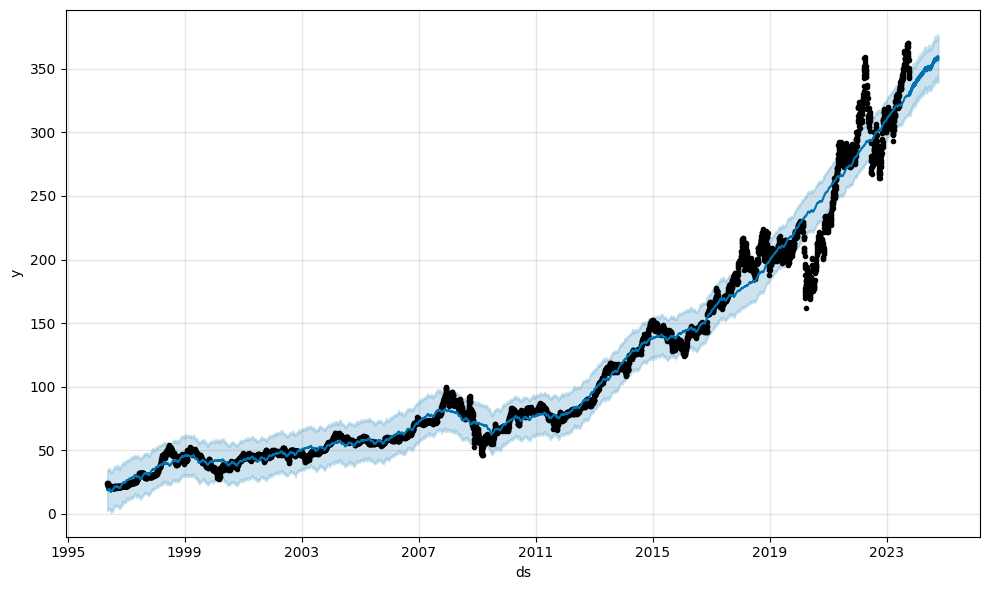

In [6]:
# visualize the forecast
m.plot(forecast);

## Make it a Function
Now that we have an understanding of the steps necessary to predict one stock for the next 365 days, let's make a function that enables us to easily predict any stock for any number of days.

This function will take 4 inputs; 3 of those inputs are the most necessary variables in the process we discovered above, and the fourth gives you the option to display the forcast as a table (as we did above). Those inputs are `ticker`, `periods`, `hist`, `display_chart` and `return_forecast` and their definitions can be found in the function below.

In [7]:
def make_forecast(
    ticker, periods, hist='max',
    return_forecast=False, display_chart=True
                  ):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    > return_forecast
        >> option to return forecast data table
            > default: False
            > options: False, True
    > return_chart
        >> option to return visual chart of forecast
            > default: True
            > options: False, True
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    # visualize the forecast if requested
    if display_chart:
      m.plot(forecast)
    else:
      pass

    # return the forecast data table if requested
    if return_forecast:
      return forecast
    else:
      pass

### Make some Forecasts with that Function

#### Predict Nvidia price

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/stu5xc2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/u3x8xiaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53072', 'data', 'file=/tmp/tmp2uuk0lzv/stu5xc2k.json', 'init=/tmp/tmp2uuk0lzv/u3x8xiaz.json', 'output', 'file=/tmp/tmp2uuk0lzv/prophet_modeldo_w43r9/prophet_model-20231006191644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


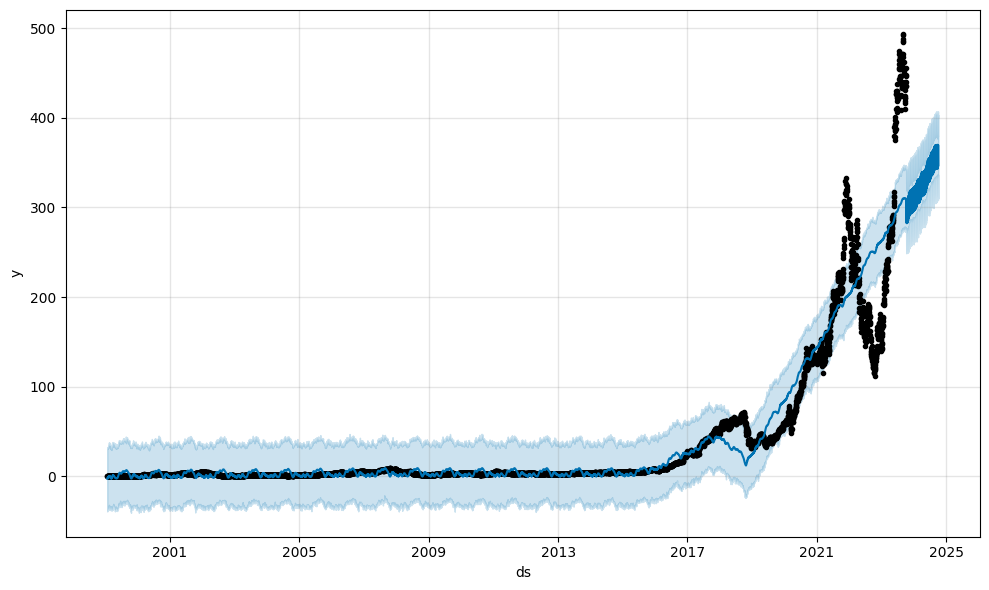

In [14]:
# visualize nvidia stock price for the next 1 year
nvda_forecast = make_forecast('NVDA', 365)

#### Predict a KKR real estate trust price

In [11]:
# forecast the kkr real estate finance trust for the next 180 days
# return the forecast table, do not visualize a chart
kkr_forecast = make_forecast('KREF', 180, return_forecast=True, display_chart=False)

# focus on the immedeately understandable columns of the forecast
kkr_forecast = kkr_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# convert those columns to layman's
kkr_forecast.columns = ['Date', 'Predicted Price', 'Lower Bound Predicted', 'Upper Bound Predicted']

# display the last 10 days of the table
kkr_forecast.tail(10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/e1zx11np.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/rja83bwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26251', 'data', 'file=/tmp/tmp2uuk0lzv/e1zx11np.json', 'init=/tmp/tmp2uuk0lzv/rja83bwq.json', 'output', 'file=/tmp/tmp2uuk0lzv/prophet_model2_ku5g1b/prophet_model-20231006191506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,Date,Predicted Price,Lower Bound Predicted,Upper Bound Predicted
1787,2024-03-25 04:00:00,6.735455,5.640978,7.817324
1788,2024-03-26 04:00:00,6.738433,5.599454,7.881261
1789,2024-03-27 04:00:00,6.751955,5.648970,7.915375
1790,2024-03-28 04:00:00,6.762762,5.721887,7.876037
1791,2024-03-29 04:00:00,6.808201,5.653344,8.042274
1792,2024-03-30 04:00:00,6.311085,5.279629,7.497435
1793,2024-03-31 04:00:00,6.710573,5.560869,7.876924
1794,2024-04-01 04:00:00,6.927688,5.784488,8.088407
1795,2024-04-02 04:00:00,6.959232,5.789159,8.088475
1796,2024-04-03 04:00:00,6.994572,5.909643,8.044624


#### Predict Bitcoin Price

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/ga4oz6z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2uuk0lzv/jv686g_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12700', 'data', 'file=/tmp/tmp2uuk0lzv/ga4oz6z9.json', 'init=/tmp/tmp2uuk0lzv/jv686g_q.json', 'output', 'file=/tmp/tmp2uuk0lzv/prophet_modelmvcj1gqn/prophet_model-20231006191254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


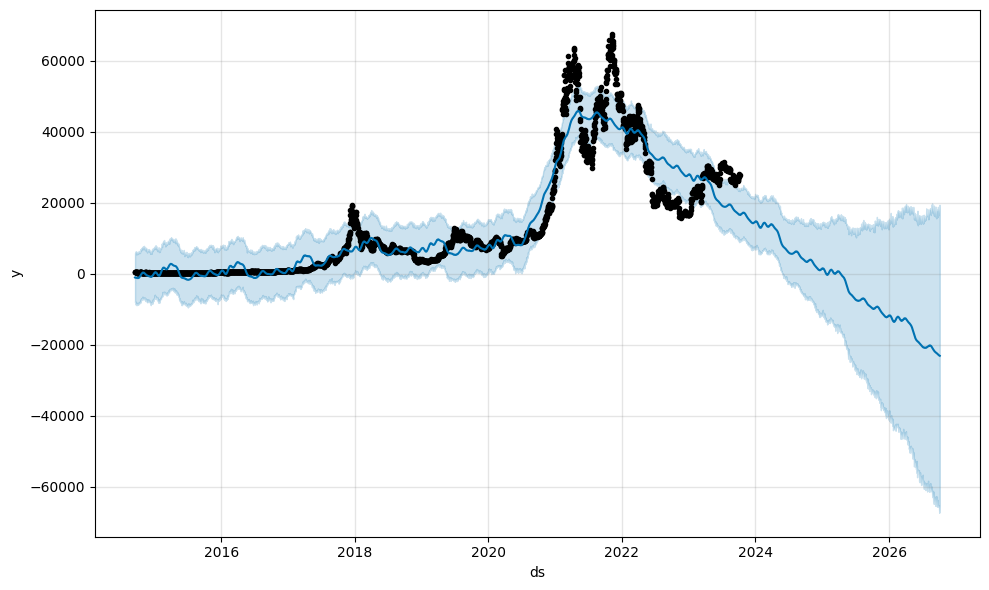

In [10]:
# set variable for number of years to predict
n_years = 3
n_days = n_years * 365

# forecast Bitcoin for that amount of time
btc_forecast = make_forecast('BTC-USD', n_days)

# display the forecasted price of Bitcoin
btc_forecast